# Scatter Plots

## To-Do List
Common views requested by the <a href="https://github.com/pysal/pysal/wiki/PySAL-Visualization-Project"> PySal Viz Project.</a>
<li><b> Moran </b> </li>
<li> Space-Time LISA </li>
<li> Bivariate LISA </li>

## Moran Scatter plot

The Moran statistic evaluates the spatial patterns present within a dataset.

The Moran’s I measures the global spatial autocorrelation in an attribute y measured over n spatial units and is given as:

<equation>

The null hypothesis is that there are no spatial patterns present in the data (equal to zero). The statistic can approach 1 for perfect positive spatial autocorrelation or -1 for perfect negative spatial autocorrelation.

Following the documentation and example from the <a href="http://www.pysal.org/users/tutorials/autocorrelation.html"> PySal Tutorial on Spatial Autocorrelation </a>: 

In [1]:
import numpy as np
import pysal as ps
import random as rdm
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from pysal.contrib.viz import mapping as maps
%matplotlib inline
# from pylab import *

In [2]:
shp_link = ps.examples.get_path('sids2.shp')
data = ps.open(shp_link)

In [3]:
db = ps.open(ps.examples.get_path('sids2.dbf'))
db.header

[u'AREA',
 u'PERIMETER',
 u'CNTY_',
 u'CNTY_ID',
 u'NAME',
 u'FIPS',
 u'FIPSNO',
 u'CRESS_ID',
 u'BIR74',
 u'SID74',
 u'NWBIR74',
 u'BIR79',
 u'SID79',
 u'NWBIR79',
 u'SIDR74',
 u'SIDR79',
 u'NWR74',
 u'NWR79']

In [4]:
y = np.array(ps.open(ps.examples.get_path('sids2.dbf')).by_col('SID79'))

## Moran's I Analysis

### Open data and the weight files.

In [5]:
SIDS = ps.open(ps.examples.get_path("sids2.dbf"))
w = ps.open(ps.examples.get_path("sids2.gal")).read() # spatial weights instance

### Assign variable names from columns in data array

In [6]:
SID79 = np.array(SIDS.by_col('SID79')) # an event variable measured across n spatial units
BIR79 = np.array(SIDS.by_col('BIR79')) # a population-at-risk variable measured across n spatial units
SIDR79 = np.array(SIDS.by_col("SIDR79"))

### Calculate Moran's I

In [7]:
# class pysal.esda.moran.Moran_Rate(e, b, w, adjusted=True, transformation='r', permutations=999, two_tailed=True)

mir = ps.esda.moran.Moran_Rate(SID79, BIR79, w, adjusted=True, transformation='r', permutations=9999, two_tailed=False)

### Review Moran's I Statistic

In [8]:
def moranSummary(mir):
    mir = mir
    print
    print 'Adjusted Moran’s I Global Autocorrelation Statistic for Rate Variables'
    print 
    print 'Moran Rate Summary Report'
    print '========================='
    print 'mir.i        {}   observed value of Moran’s I'.format("%6.4f" % mir.I)
    print 'mir.EI      {}   expected value under normality assumption'.format("%6.4f" % mir.EI)
    print 'mir.EI_sim  {}   average value of I from permutations  '.format("%6.4f" % mir.EI_sim)
    print 'mir.z_sim    {}   standardized I based on permutations'.format("%6.4f" % mir.z_sim)
    print 'mir.p_z_sim  {}   p-value based on standard normal approximation from permutations'.format("%6.4f" % mir.p_z_sim)
    print 'mir.p_sim    {}   p-value based on permutations'.format("%6.4f" % mir.p_sim)

In [9]:
moranSummary(mir)


Adjusted Moran’s I Global Autocorrelation Statistic for Rate Variables

Moran Rate Summary Report
mir.i        0.1662   observed value of Moran’s I
mir.EI      -0.0101   expected value under normality assumption
mir.EI_sim  -0.0104   average value of I from permutations  
mir.z_sim    2.6687   standardized I based on permutations
mir.p_z_sim  0.0038   p-value based on standard normal approximation from permutations
mir.p_sim    0.0066   p-value based on permutations


## Plot Moran I as a regular scatter plot, or spatial lag versus our variable of interest.

### Calculate the spatial lag for the SIDS79 variable

In [10]:
var = SID79
slag= ps.lag_spatial(w, SID79)
w.transform = 'r'

### Determine Moran Plot quadrants for Data, and transform W for analysis

In [11]:
# Z-Score standardisation
zx   = (var - var.mean())/var.std()
zy  = (slag - slag.mean())/slag.std()
fit = ps.spreg.OLS(zx[:, None], zy[:,None])

In [14]:
quad = np.zeros(var.shape)
quad[np.bitwise_and(zy > 0, zx > 0)]=1 # HH
quad[np.bitwise_and(zy > 0, zx < 0)]=2 # LH
quad[np.bitwise_and(zy < 0, zx < 0)]=3 # LL
quad[np.bitwise_and(zy < 0, zx > 0)]=4 # HL

In [15]:
# Check that we're returning an array of values
zy

array([-0.96740878, -0.83765903, -0.35758492, -1.38909549, -0.27000384,
       -1.03228366, -1.16203342, -1.21393332, -0.41597232,  0.20033903,
       -0.41597232,  1.04371245,  0.77123796, -0.02672304, -1.29178318,
       -0.80522159, -1.42153293, -1.0241743 , -0.90253391, -1.2269083 ,
       -1.48640781, -0.43543478, -0.16296029,  0.26521391,  0.29765135,
        0.42091362,  0.45983855, -0.66898434, -0.04618551,  0.18736406,
        0.34306376, -1.29178318,  0.22628898, -0.18891024, -0.36731616,
       -0.18891024,  0.0057144 ,  0.07058927,  0.56796334, -0.12403536,
        0.36252623,  1.14102477,  0.39496367, -1.29178318, -1.68103245,
       -0.25378512,  0.68690062,  0.82475974,  0.49227599, -0.00726058,
        0.07058927, -0.20188522, -0.64303439,  1.17346221, -0.47435971,
       -1.48640781, -0.67547183, -0.85387775,  1.28699325, -0.51328463,
        0.49227599,  0.10302671,  1.62758636,  1.04371245,  2.52285969,
       -0.85387775,  0.97072821,  0.92693767,  0.81016289, -0.28

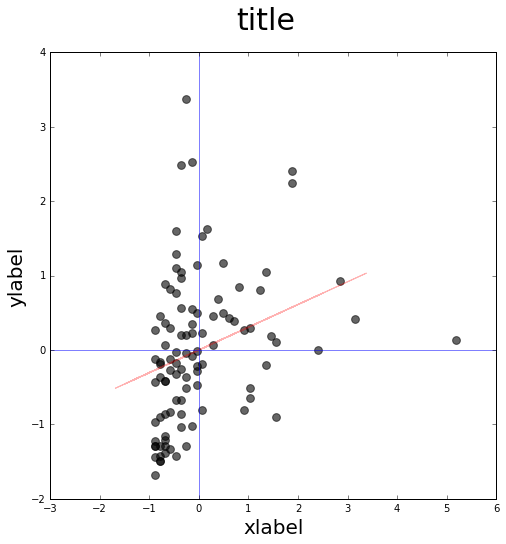

In [18]:

## Operationialize a Moran Plot -- Very Basic:
## Input arguments: variable and weight
## maps.plot_moran(var, w)
## options: title='title', xlabel='xlabel', ylabel='ylabel', figsize=()

var = SID79
w = w
slag = ps.lag_spatial(w, var)

y_std   = (var - var.mean())/var.std()
yl_std  = (slag - slag.mean())/slag.std()

#custom
xlabel = "xlabel"
ylabel = "ylabel"
title = "title"
custom = (8,8)

#custom 
fig1 = plt.figure(figsize=custom)
plt.xlabel(xlabel, fontsize=20)
plt.ylabel(ylabel, fontsize=20)
plt.suptitle(title, fontsize=30)

plt.scatter(y_std, yl_std, s=60, color='k', alpha=.6)
plt.plot(zy, fit.predy, color='r', alpha=.3)

plt.axvline(0, alpha=0.5)
plt.axhline(0, alpha=0.5)

plt.show()

## Test New Function

In [62]:
def moran(var, w, xlabel='', ylabel='', title='', custom=(8,8)):
    y_std   = (var - var.mean())/var.std()
    yl_std  = (slag - slag.mean())/slag.std()

    #xlabel = "xlabel"
    #ylabel = "ylabel"
    title = "Moran's I = %" fit.betas[1]
    #custom = (8,8)

    #custom 
    fig1 = plt.figure(figsize=custom)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.suptitle(title, fontsize=30)

    plt.scatter(y_std, yl_std, s=60, color='k', alpha=.6)
    plt.plot(zy, fit.predy, color='r', alpha=.3)

    plt.axvline(0, alpha=0.5)
    plt.axhline(0, alpha=0.5)

    plt.show()
    

SyntaxError: invalid syntax (<ipython-input-62-0ee0821ebd3e>, line 7)

In [63]:
moran(var,w)

ValueError: incomplete format

In [25]:
xlabel, ylabel, title, custom

('xlabel', 'ylabel', 'title', (8, 8))

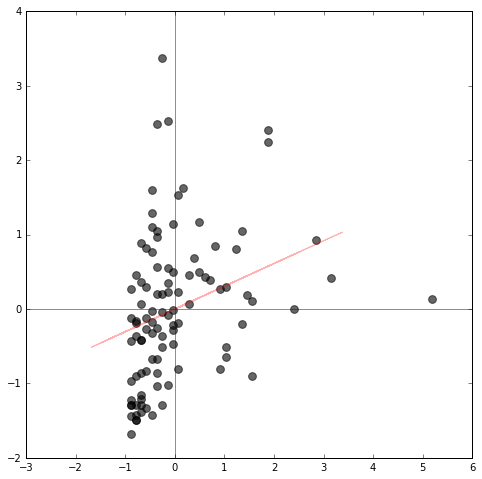

In [28]:
moran(var, w, custom=(8,8))

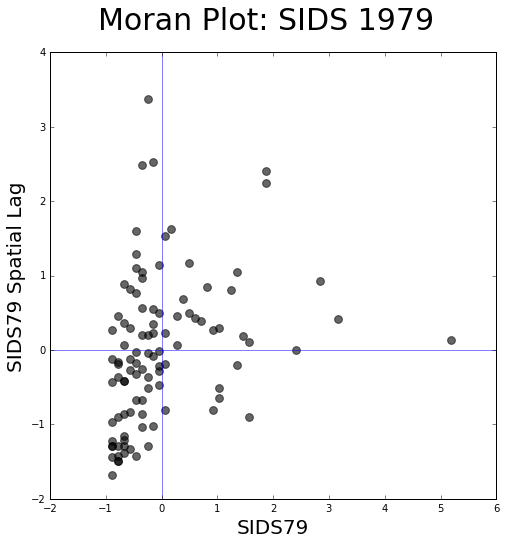

In [29]:
fig2 = plt.figure(figsize=(8,8))

plt.scatter(y_std, yl_std, s=60, color='k', alpha=.6)

# Add title and labels
plt.suptitle('Moran Plot: SIDS 1979', fontsize=30)
plt.xlabel('SIDS79', fontsize=20)
plt.ylabel('SIDS79 Spatial Lag', fontsize=20)

# Add vertical and horizontal lines
plt.axvline(0, alpha=0.5)
plt.axhline(0, alpha=0.5)


plt.show()


## Customize Moran Plot 

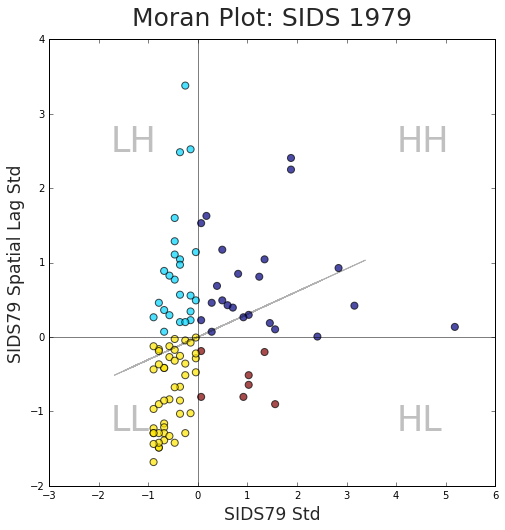

In [31]:
lfont = {'fontname': 'sans-serif', 'weight': 'light', 'size': 'xx-large'}
qfont = {'fontname': 'sans-serif', 'weight': 'light'}

fig3 = plt.figure(figsize=(8,8))
plt.scatter(y_std, yl_std, s=50, c=quad, color='k', alpha=.7)

# Plot OLS fit
##plot(SID79[:, None], ols.predy, color='k')

# Add vertical and horizontal lines
plt.axvline(0, alpha=0.5, color='k')
plt.axhline(0, alpha=0.5, color='k')

plt.plot(zy, fit.predy, color='k', alpha=.3)


# Add title and labels
plt.title('Moran Plot: SIDS 1979', lfont, fontsize=25, alpha=.85, y=1.02)
plt.xlabel('SIDS79 Std', lfont, alpha=.85)
plt.ylabel('SIDS79 Spatial Lag Std', lfont, alpha=.85)

# Add quadrant categories
plt.text(4.0, 2.5, "HH",  qfont, fontsize=35, alpha=.25)
plt.text(4.0, -1.25, "HL", qfont,fontsize=35, alpha=.25)
plt.text(-1.75, 2.5, "LH", qfont, fontsize=35,alpha=.25)
plt.text(-1.75, -1.25, "LL", qfont, fontsize=35,alpha=.25)

plt.show()